 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [114]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [115]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [116]:
type(whale_returns['SOROS FUND MANAGEMENT LLC'])

pandas.core.series.Series

In [117]:
# Count nulls
print(whale_returns.isnull().sum())


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [118]:
# Drop nulls
clean_whale_returns=whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [119]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)

In [120]:
# Count nulls
print(algo_returns.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [121]:
# Drop nulls
clean_algo_returns= algo_returns.dropna

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [122]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)

In [123]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [124]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace("$", "")
# sp500_history = sp500_history.replace(".", "")
sp500_history = sp500_history.astype(float)


In [125]:
# cast to string

df[col] = df[col].astype(str)  

# all the string surgery goes in here
df[col] = df[col].replace('$', '')
df[col] = df[col].replace(',', '')  # assuming ',' is the thousand's separator in your locale
df[col] = df[col].replace('%', '')

df[col] = df[col].astype(float)  # cast back to appropriate typ

NameError: name 'df' is not defined

In [126]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [127]:
# Drop nulls
clean_sp500_daily_returns = sp500_daily_returns.dropna()
print(clean_sp500_daily_returns)

               Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1648 rows x 1 columns]


In [128]:
# Rename `Close` Column to be specific to this portfolio.
clean_sp500_daily_returns.rename(columns={"Close":"Sp500"}, inplace = True)

/Users/rosalynbrown/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## Combine Whale, Algorithmic, and S&P 500 Returns

In [129]:
clean_sp500_daily_returns.index

DatetimeIndex(['2019-04-22', '2019-04-18', '2019-04-17', '2019-04-16',
               '2019-04-15', '2019-04-12', '2019-04-11', '2019-04-10',
               '2019-04-09', '2019-04-08',
               ...
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03',
               '2012-10-02', '2012-10-01'],
              dtype='datetime64[ns]', name='Date', length=1648, freq=None)

In [130]:
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [131]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_all = pd.concat([whale_returns, algo_returns, clean_sp500_daily_returns], axis = "columns").dropna()

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [132]:
df_all.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:xlabel='Date'>

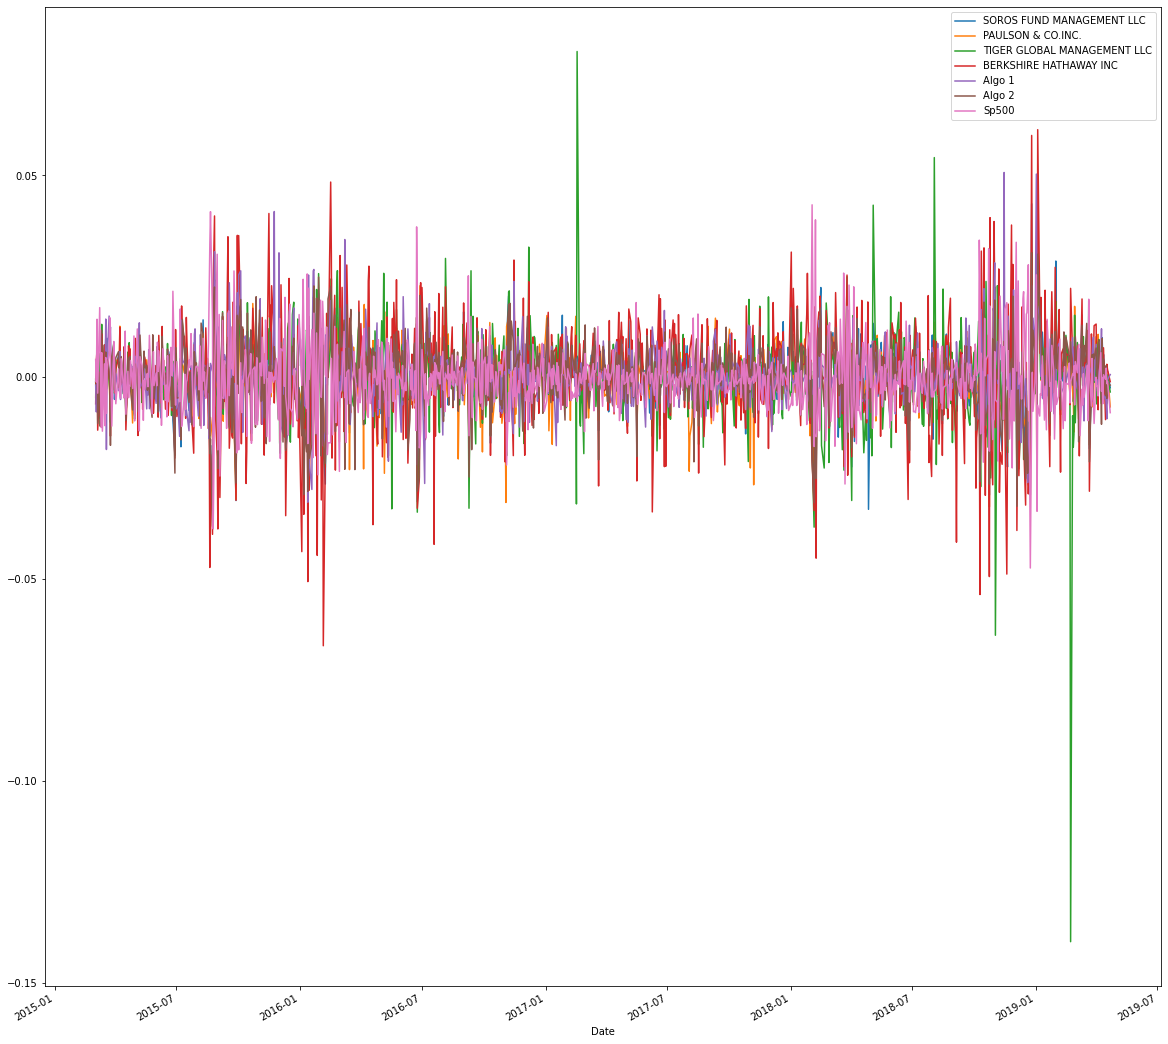

In [133]:
# Plot daily returns of all portfolios
df_all.plot(figsize  = (20,20))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

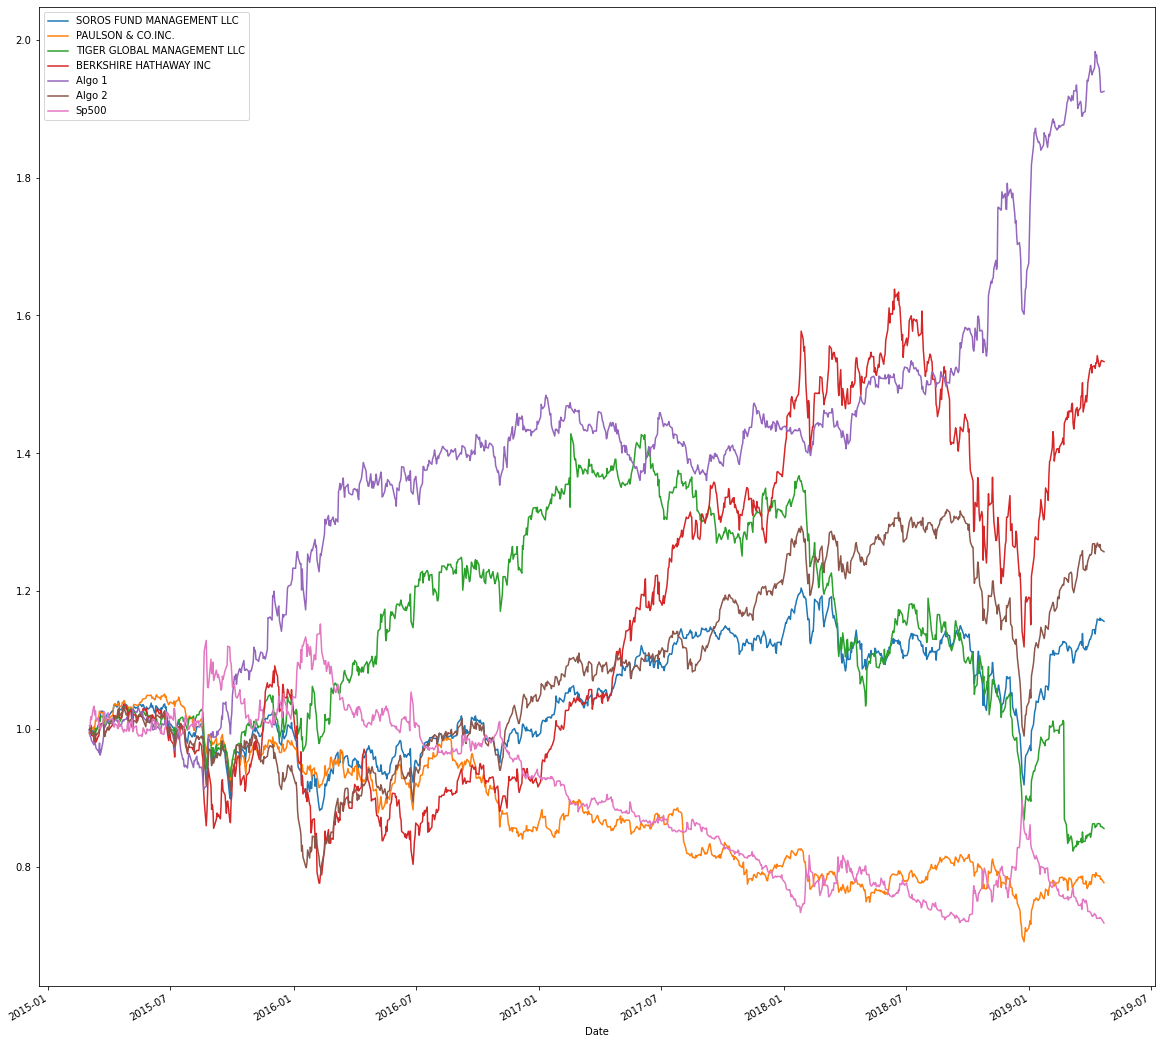

In [134]:
# Calculate cumulative returns of all portfolios
df_cum = (1+ df_all).cumprod()
# Plot cumulative returns
df_cum.plot(figsize = (20,20))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

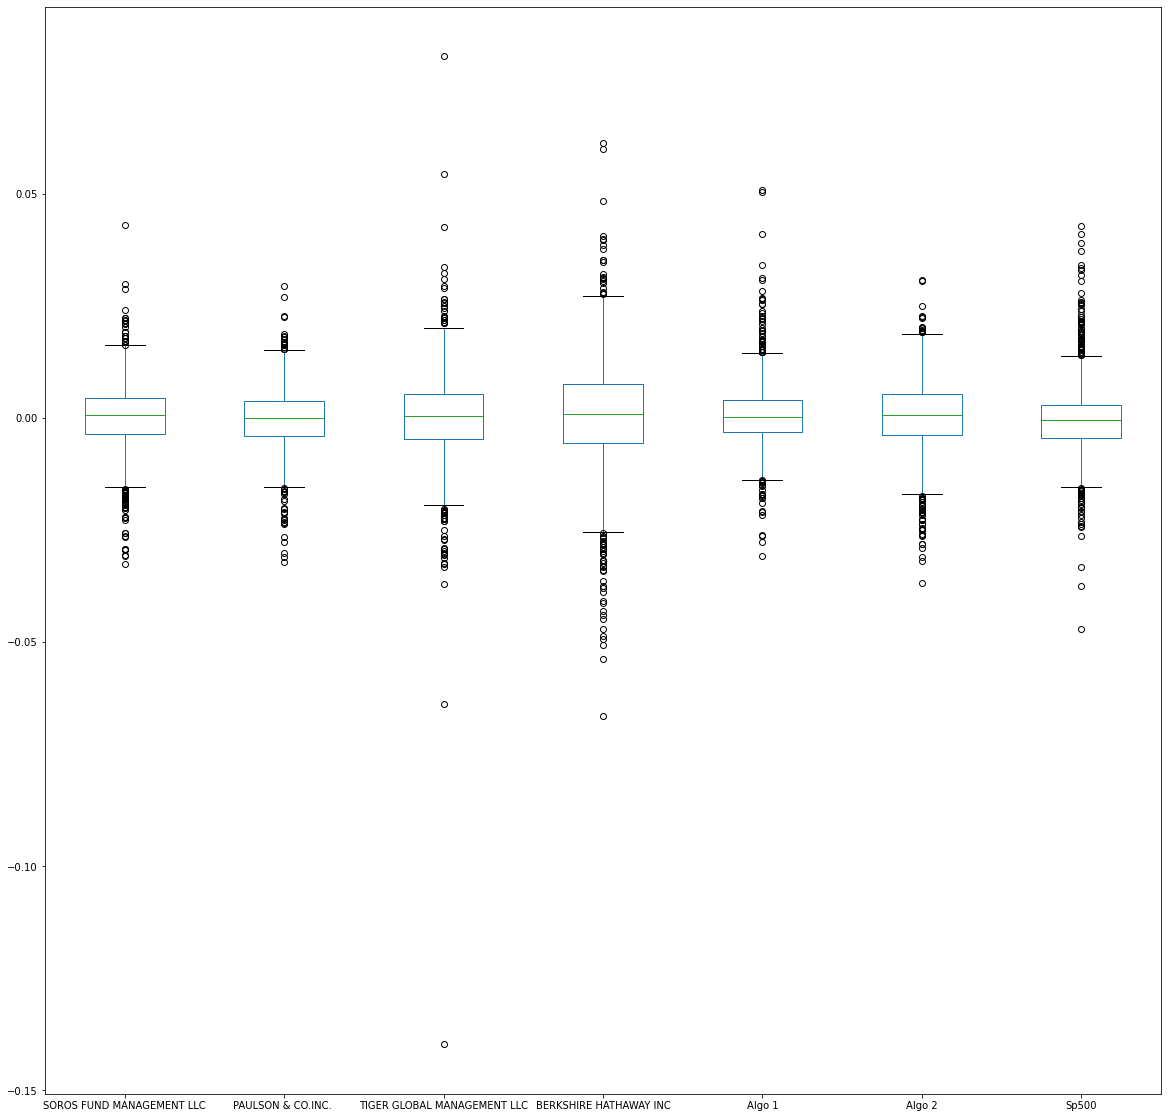

In [135]:
# Box plot to visually show risk
df_all.plot(kind= "box", figsize = (20,20))

### Calculate Standard Deviations

In [136]:
# Calculate the daily standard deviations of all portfolios
df_all_std = pd.DataFrame(df_all.std()).rename(columns = {0:"std"})
print(df_all_std)

                                  std
SOROS FUND MANAGEMENT LLC    0.007896
PAULSON & CO.INC.            0.007026
TIGER GLOBAL MANAGEMENT LLC  0.010897
BERKSHIRE HATHAWAY INC       0.012919
Algo 1                       0.007623
Algo 2                       0.008341
Sp500                        0.008587


### Determine which portfolios are riskier than the S&P 500

In [137]:
df_all_std

,std
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
Sp500,0.008587


In [138]:
# Calculate  the daily standard deviation of S&P 500
higher_stdsp = df_all_std["std"] > df_all_std.loc["Sp500","std"]
# Determine which portfolios are riskier than the S&P 500
print(higher_stdsp)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
Sp500                          False
Name: std, dtype: bool


### Calculate the Annualized Standard Deviation

In [139]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_all_std*252**.5
print(df_annualized_std)

                                  std
SOROS FUND MANAGEMENT LLC    0.125348
PAULSON & CO.INC.            0.111527
TIGER GLOBAL MANAGEMENT LLC  0.172989
BERKSHIRE HATHAWAY INC       0.205079
Algo 1                       0.121006
Algo 2                       0.132413
Sp500                        0.136313


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

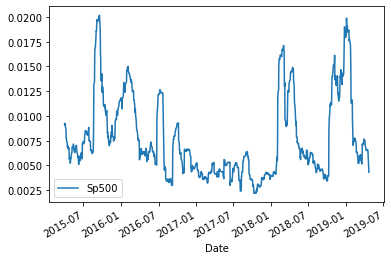

In [140]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_sp50021 = df_all[["Sp500"]].rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_sp50021.plot()

### Calculate and plot the correlation

In [141]:
# Calculate the correlation
corr_df_all = df_all.corr()
# Display de correlation matrix
corr_df_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [142]:
df_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [144]:
df_all['SOROS FUND MANAGEMENT LLC']

Date
2015-03-03   -0.001266
2015-03-04    0.002230
2015-03-05    0.004016
2015-03-06   -0.007905
2015-03-09    0.000582
                ...   
2019-04-15   -0.001422
2019-04-16    0.002699
2019-04-17   -0.002897
2019-04-18    0.001448
2019-04-22   -0.002586
Name: SOROS FUND MANAGEMENT LLC, Length: 1042, dtype: float64

<AxesSubplot:xlabel='Date'>

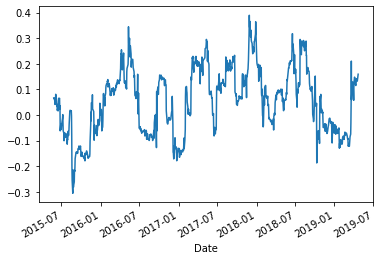

In [145]:
# Calculate covariance of a single portfolio
covariance = df_all["SOROS FUND MANAGEMENT LLC"].rolling(60).cov(df_all["Sp500"])
covariance
# Calculate variance of S&P 500
variance = df_all['Sp500'].rolling(60).var()
variance
# Computing beta
SOROS_FUND_MANAGEMENT_LLC_beta = covariance/variance
# Plot beta trend
SOROS_FUND_MANAGEMENT_LLC_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [146]:
# Use `ewm` to calculate the rolling window
df_all.ewm(halflife=21).mean()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [147]:
# Annualized Sharpe Ratios
sharpe_ratio = (df_all.mean()*252)/(df_all.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Sp500                         -0.518582
dtype: float64

<AxesSubplot:>

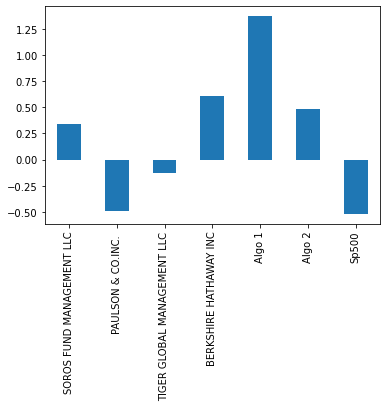

In [148]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Yes Algo 1 does and Algo 2 is close

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [149]:
# Reading data from 1st stock
goog = pd.read_csv(Path("Resources/goog_historical.csv"), index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [150]:
# Reading data from 2nd stock
aapl = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [151]:
# Reading data from 3rd stock
cost = pd.read_csv(Path("Resources/cost_historical.csv"), index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [152]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat((goog, aapl, cost), axis=1, join="inner")
all_stocks

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48


In [153]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()
all_stocks.index

DatetimeIndex(['2019-05-09', '2019-05-08', '2019-05-07', '2019-05-06',
               '2019-05-03', '2019-05-02', '2019-05-01', '2019-04-30',
               '2019-04-29', '2019-04-26',
               ...
               '2018-05-24', '2018-05-23', '2018-05-22', '2018-05-21',
               '2018-05-18', '2018-05-17', '2018-05-16', '2018-05-15',
               '2018-05-14', '2018-05-11'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [154]:
# Reorganize portfolio data by having a column per symbol
goog.rename(columns={"NOCP":"GOOG"}, inplace=True)
aapl.rename(columns={"NOCP":"AAPL"}, inplace=True)
cost.rename(columns={"NOCP":"COST"}, inplace=True)
all_new = pd.concat((goog, aapl, cost), axis=1, join="inner")
all_new=all_new.drop(columns='Symbol')

In [155]:
# Calculate daily returns

# Drop NAs
all_new.dropna(inplace=True)
# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [156]:
all_new

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [176]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# weighted_all = all_new.pct_change()
weighted_all = all_new.dot(weights)
weighted_all.dropna(inplace = True)

# Display sample data
weighted_all.head()

Trade DATE
2019-05-09    535.523333
2019-05-08    536.836667
2019-05-07    539.046667
2019-05-06    547.366667
2019-05-03    547.256667
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [181]:
# Join your returns DataFrame to the original returns DataFrame
total_portfolio = pd.concat((weighted_all, all_new), axis = 1, join = "inner")
total_portfolio=total_portfolio.rename(columns={0: 'Weighted'})
total_portfolio.head()

,Weighted,GOOG,AAPL,COST
Trade DATE,,,,
2019-05-09,535.523333,1162.38,200.72,243.47
2019-05-08,536.836667,1166.27,202.90,241.34
2019-05-07,539.046667,1174.10,202.86,240.18
2019-05-06,547.366667,1189.39,208.48,244.23
2019-05-03,547.256667,1185.40,211.75,244.62


In [182]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio.dropna(inplace=True)
total_portfolio

,Weighted,GOOG,AAPL,COST
Trade DATE,,,,
2019-05-09,535.523333,1162.38,200.72,243.47
2019-05-08,536.836667,1166.27,202.90,241.34
2019-05-07,539.046667,1174.10,202.86,240.18
2019-05-06,547.366667,1189.39,208.48,244.23
2019-05-03,547.256667,1185.40,211.75,244.62
...,...,...,...,...
2018-05-17,488.393333,1078.59,186.99,199.60
2018-05-16,489.553333,1081.77,188.18,198.71
2018-05-15,487.050000,1079.23,186.44,195.48


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [183]:
# Calculate the annualized `std`
total_portfolio_std = pd.DataFrame(total_portfolio.std())
total_portfolio_std

,0
Weighted,30.252708
GOOG,67.846776
AAPL,21.436472
COST,14.434399


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

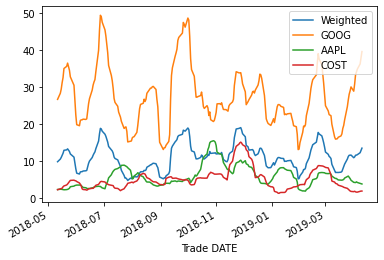

In [184]:
# Calculate rolling standard deviation
total_portfolio_rolling21 = total_portfolio.rolling(window = 21).std()
# Plot rolling standard deviation
total_portfolio_rolling21.plot()

### Calculate and plot the correlation

<AxesSubplot:>

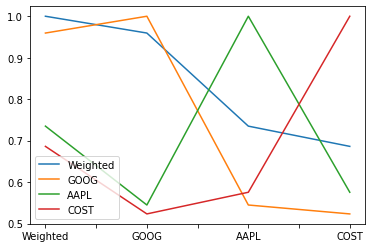

In [185]:
# Calculate and plot the correlation
total_portfolio_corr = total_portfolio.corr()
total_portfolio_corr.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Trade DATE,None'>

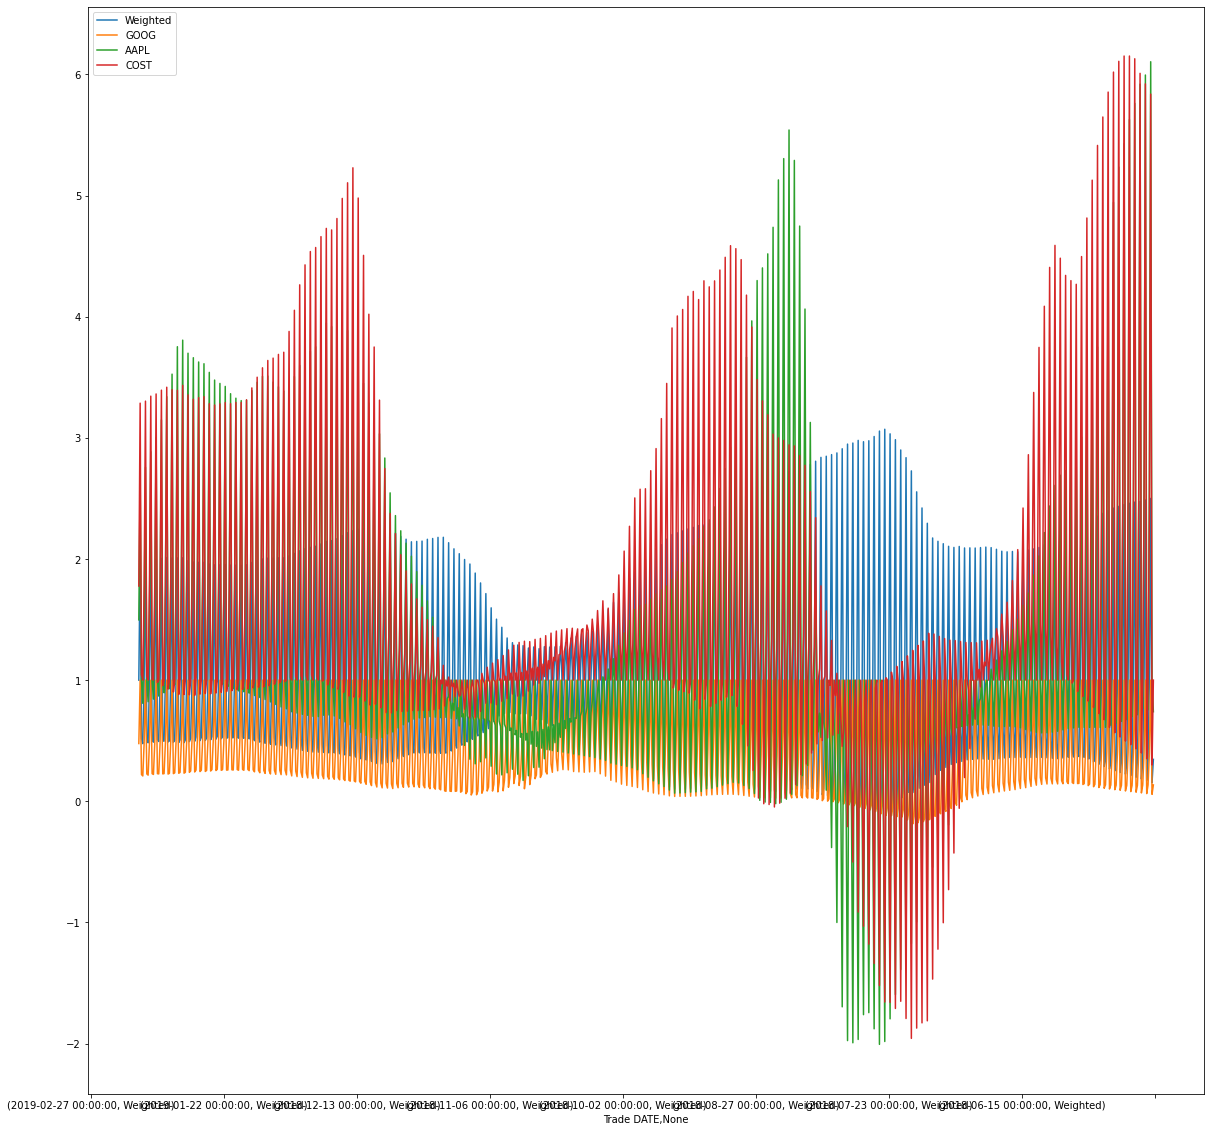

In [186]:
# Calculate and plot Beta
rolling_covariance = total_portfolio.rolling(window = 60).cov()
rolling_variance = total_portfolio.rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize=(20,20))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [187]:
df_all.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [188]:
total_portfolio.head()

,Weighted,GOOG,AAPL,COST
Trade DATE,,,,
2019-05-09,535.523333,1162.38,200.72,243.47
2019-05-08,536.836667,1166.27,202.90,241.34
2019-05-07,539.046667,1174.10,202.86,240.18
2019-05-06,547.366667,1189.39,208.48,244.23
2019-05-03,547.256667,1185.40,211.75,244.62


In [189]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = ((total_portfolio.mean()-df_all['Sp500'].mean())*252)/(total_portfolio.std()*np.sqrt(252))
sharpe_ratio

Weighted    271.303386
GOOG        266.090619
AAPL        141.987664
COST        244.269303
dtype: float64

<AxesSubplot:>

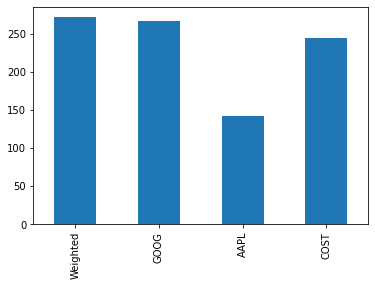

In [193]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
My porfolio performs better than all the stocks on their own. 